In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("input.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


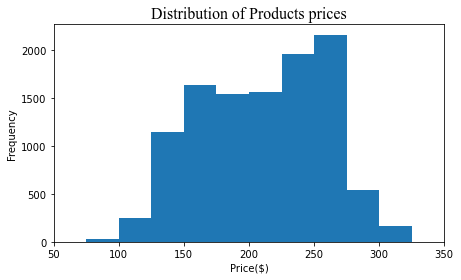

In [3]:
plt.figure(figsize=[7,4])
bins=np.arange(0,df['Cost_of_the_Product'].max()+25,25)
plt.hist(df['Cost_of_the_Product'],bins=bins);
plt.title('Distribution of Products prices',fontname='Times new roman',fontsize=16);
plt.xlim((50,350))
plt.ylabel('Frequency');
plt.xlabel('Price($)');

In [5]:
cost_min = df['Cost_of_the_Product'].min()
print("Minimum cost of the product is: ",cost_min)

Minimum cost of the product is:  96


In [7]:
cost_max = df['Cost_of_the_Product'].max()
print("Maximum cost of the product is: ",cost_max)

Maximum cost of the product is:  310


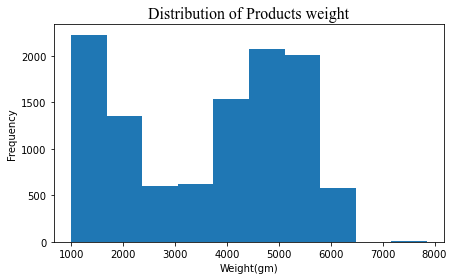

In [8]:
plt.figure(figsize=[7,4])
plt.hist(df['Weight_in_gms']);
plt.title('Distribution of Products weight',fontname='Times new roman',fontsize=16);
#plt.xlim((50,350))
plt.ylabel('Frequency');
plt.xlabel('Weight(gm)');

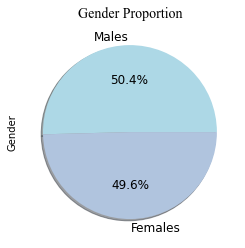

In [9]:
plt.figure(figsize=[7,4])

my_colors = ['lightblue','lightsteelblue']
my_explode = (0, 0)
df['Gender'].value_counts(normalize=True).plot(kind='pie',labels=['Males','Females'],
                                                           fontsize=12,autopct='%1.1f%%', startangle=0, shadow = True,colors=my_colors
                                                           ,explode=my_explode);
plt.title('Gender Proportion',fontname='Times new roman',fontsize=14);

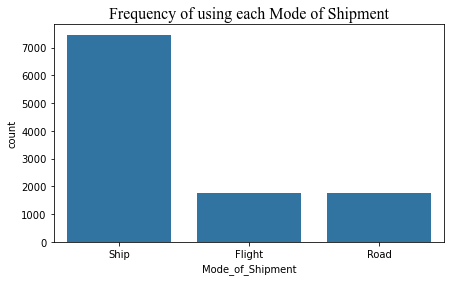

In [10]:
plt.figure(figsize=[7,4])
base_color=sns.color_palette()[0]
ship_order=df['Mode_of_Shipment'].value_counts().index
sns.countplot(data=df,x='Mode_of_Shipment',color=base_color,order=ship_order)
plt.title('Frequency of using each Mode of Shipment',fontname='Times new roman',fontsize=16);

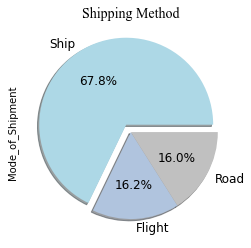

In [11]:
plt.figure(figsize=[7,4])

my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0.1, 0,0)
df['Mode_of_Shipment'].value_counts(normalize=True).plot(kind='pie',
                                                           fontsize=12,autopct='%1.1f%%', startangle=0, shadow = True,colors=my_colors
                                                           ,explode=my_explode);
plt.title('Shipping Method',fontname='Times new roman',fontsize=14);

Text(0.5, 1.0, 'Rate of shipping on time for different modes of shipment')

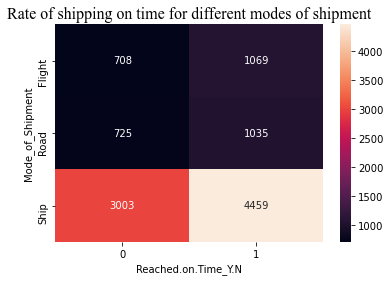

In [12]:
ct_counts=df.groupby(['Mode_of_Shipment','Reached.on.Time_Y.N']).size()

ct_counts=ct_counts.reset_index(name='count')
ct_counts=ct_counts.pivot(index='Mode_of_Shipment',columns='Reached.on.Time_Y.N',values='count')

sns.heatmap(ct_counts,annot=True,fmt='d');
plt.title('Rate of shipping on time for different modes of shipment',fontname='Times new roman',fontsize=16)

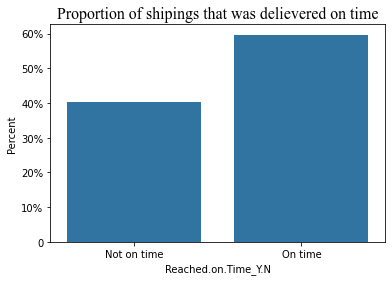

In [13]:
ax = sns.barplot(x="Reached.on.Time_Y.N", y='Reached.on.Time_Y.N', data=df, estimator=lambda x: len(x) / len(df) * 100,color=base_color)
ax.set(ylabel="Percent")
plt.title('Proportion of shipings that was delievered on time',fontname='Times new roman',fontsize=16)
plt.yticks([0,10,20,30,40,50,60],['0','10%','20%','30%','40%','50%','60%']);
plt.xticks([0,1],['Not on time','On time']);


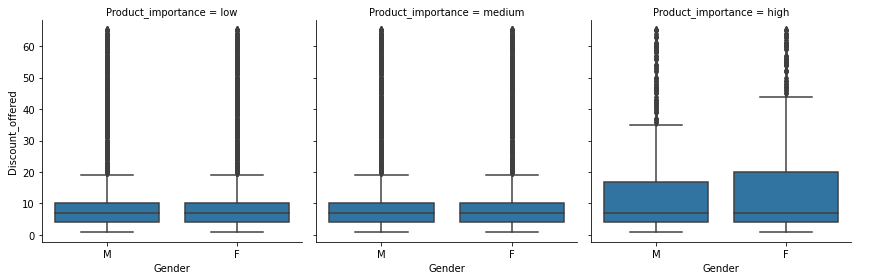

In [14]:
g=sns.FacetGrid(data=df,col='Product_importance',height=4)
g=g.map(sns.boxplot,'Gender','Discount_offered',order=['M','F']);
g.add_legend();


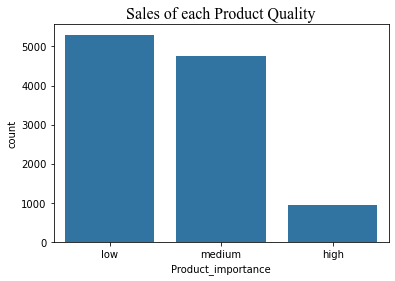

In [15]:
sns.countplot(data=df,x='Product_importance',color=base_color)
plt.title('Sales of each Product Quality',fontname='Times new roman',fontsize=16);

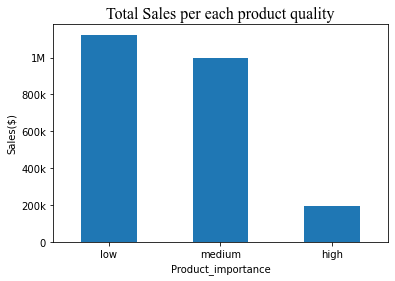

In [16]:
df.groupby('Product_importance')['Cost_of_the_Product'].sum().sort_values(ascending=False).plot(kind='bar');
plt.title('Total Sales per each product quality',fontname='Times new roman',fontsize=16);
plt.yticks([0.0*1e6,0.2*1e6,0.4*1e6,0.6*1e6,0.8*1e6,1.0*1e6],['0','200k','400k','600k','800k','1M']);
plt.ylabel('Sales($)');
plt.xticks(rotation=0);

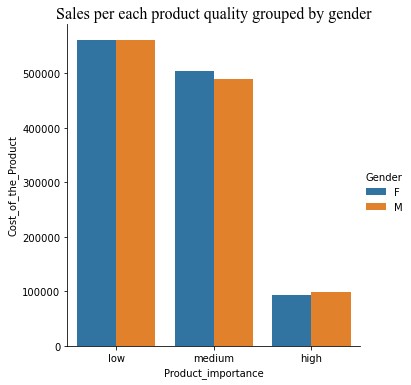

In [17]:
sns.catplot(x="Product_importance", y='Cost_of_the_Product',hue='Gender' , data=df, kind="bar",ci=None,estimator=sum);
plt.title('Sales per each product quality grouped by gender',fontname='Times new roman',fontsize=16);

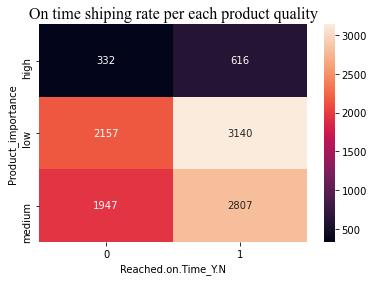

In [18]:
ct_counts=df.groupby(['Product_importance','Reached.on.Time_Y.N']).size()
ct_counts=ct_counts.reset_index(name='count')
ct_counts=ct_counts.pivot(index='Product_importance',columns='Reached.on.Time_Y.N',values='count')
sns.heatmap(ct_counts,annot=True,fmt='d');
plt.title('On time shiping rate per each product quality',fontname='Times new roman',fontsize=16);

In [19]:
print('High quality product rate:',round(616/(616+332),2)*100,'%')
print('Low quality product rate:',round(3140/(3140+2157),2)*100,'%')
print('med quality product rate:',round(2807/(2807+1947),2)*100,'%')


High quality product rate: 65.0 %
Low quality product rate: 59.0 %
med quality product rate: 59.0 %


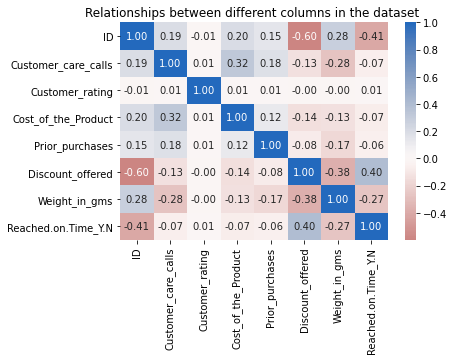

In [20]:
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='vlag_r',center=0);
plt.title('Relationships between different columns in the dataset ');

Text(0.5, 1.0, 'customers rate for the company')

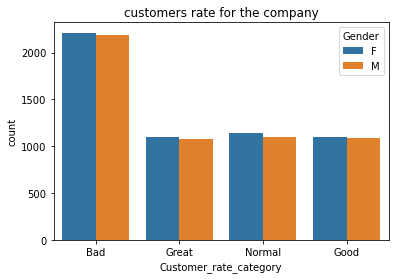

In [22]:
sns.countplot(data=df,x='Customer_rate_category',hue='Gender')
plt.title('customers rate for the company')

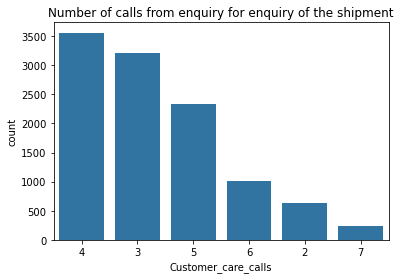

In [23]:
order=df['Customer_care_calls'].value_counts().index
sns.countplot(data=df,x='Customer_care_calls',color=base_color,order=order);
plt.title('Number of calls from enquiry for enquiry of the shipment');